In [20]:
from utils_paths import load_parquet_or_csv, get_accelero_id_from_parquet_or_csv_files
from utils_plotting import *
import pandas as pd
import pickle
import networkx as nx
import torch


In [31]:
with open("/home/pa/CodingProjects/ML/wait4_cows/cowbert_out/cow_embeddings.csv",'r') as f:
    table = pd.read_csv(f,index_col="cow_id")

# Create mappings
user_mapping = {userid: i for i, userid in enumerate(np.unique(table.index))}
item_mapping = {isbn: i for i, isbn in enumerate(np.unique(table.columns))}

num_users = len(user_mapping)
num_items = len(item_mapping)
num_total = num_users + num_items

print("num_users : ", num_users)
print("num_items : ", num_items)
print("num_total : ", num_total)

# Create edge_index
user_ids = torch.LongTensor([user_mapping[i] for i in table.index])
item_ids = torch.LongTensor([item_mapping[i] + num_users for i in table.columns])  # shift item IDs
edge_index = torch.cat((user_ids, item_ids))  # shape: [2, num_edges]
print(edge_index)

# Create edge weights from the 'cluster' column
edge_weight = torch.tensor(table.values, dtype=torch.float32)

num_users :  43
num_items :  128
num_total :  171
tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  83,  94, 105, 116, 127, 138, 149, 160,  45,  56,  67,
         76,  77,  78,  79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136,
        137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  68,  69,  70,  71,  72,
         73,  

In [2]:
with open("../outputs/temporal_graphs/temporal_graphs_rssineg75_snap20s_mean_20260123_002554.pkl",'rb') as f:
    temporal_graphs = pickle.load(f)


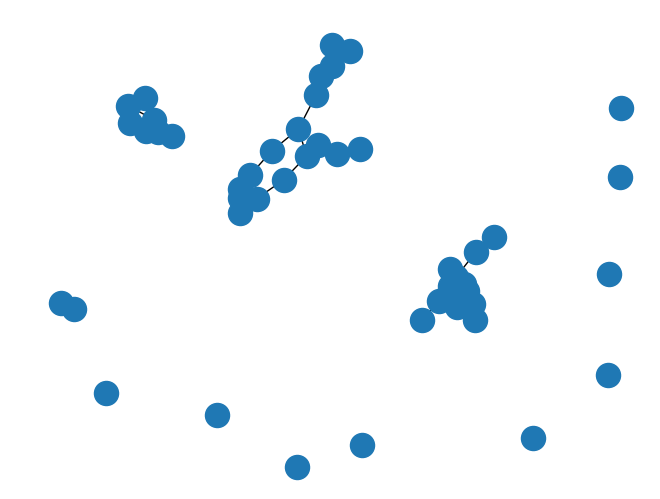

In [3]:
nx.draw(temporal_graphs[1721]['graph'])
plt.show()

['3d05', '3d0c', '3cff', '3d06']


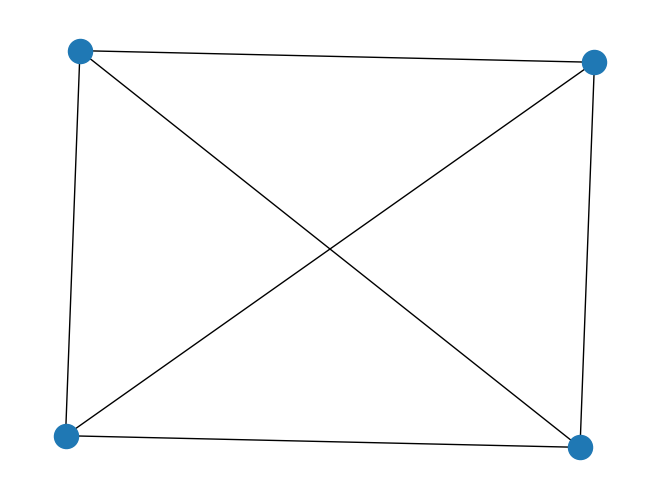

In [23]:
g = temporal_graphs[1721]['graph']
subgraphs = [g.subgraph(c).copy() for c in nx.connected_components(g)]

egos = []
"""for graph in subgraphs[0:1]:
    if len(graph.nodes) >= 2:
        for node in graph.nodes:
            egos.append(nx.ego_graph(graph,node))"""
ego = nx.ego_graph(subgraphs[1],'3d0c',radius=1)   
print(ego.nodes)
nx.draw(ego)
plt.show()

In [4]:
metric = lambda graph: sum(d for _,d in graph.degree())/len(graph.nodes)
#len(list(nx.connected_components(graph)))
#nx.average_clustering(graph)
#sum(d for _,d in graph.degree())/len(graph.nodes)
metric(temporal_graphs[1721]["graph"])


3.5918367346938775

### Computing the metric on every snapshot

In [5]:
metric_over_time = [metric(snap["graph"]) for snap in temporal_graphs ]

### distribution

2.6725790240020197


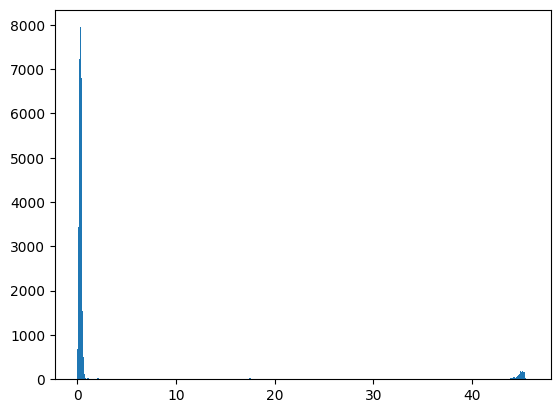

In [6]:
print(f'{np.mean(metric_over_time)}')
plt.hist(metric_over_time,bins=500)
plt.show()

In [7]:
class day_ticks:
    def __init__(self, t_graphs,start_time = None):
        self.ids: list[int] = []
        self.days: list[str] = []
        if not start_time:
            start_time =  t_graphs[0]['timestamp']

        current = ""
        for i,tg in enumerate(t_graphs):
            days_ellapsed = str(tg['timestamp'] - start_time)[0]
            if days_ellapsed != current:
                current = days_ellapsed
                self.ids.append(i)
                self.days.append(current)

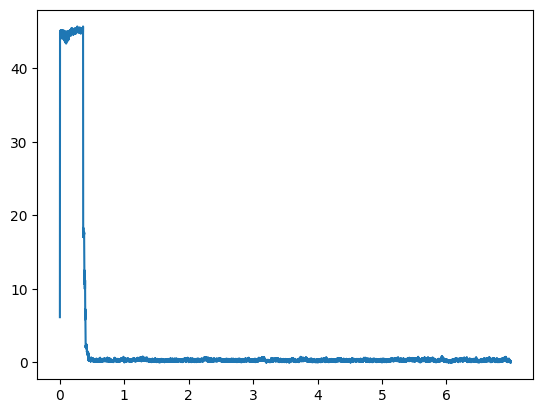

In [8]:

custom_xticks = day_ticks(temporal_graphs)
plt.plot(metric_over_time)

plt.xticks(custom_xticks.ids,custom_xticks.days)
plt.show()

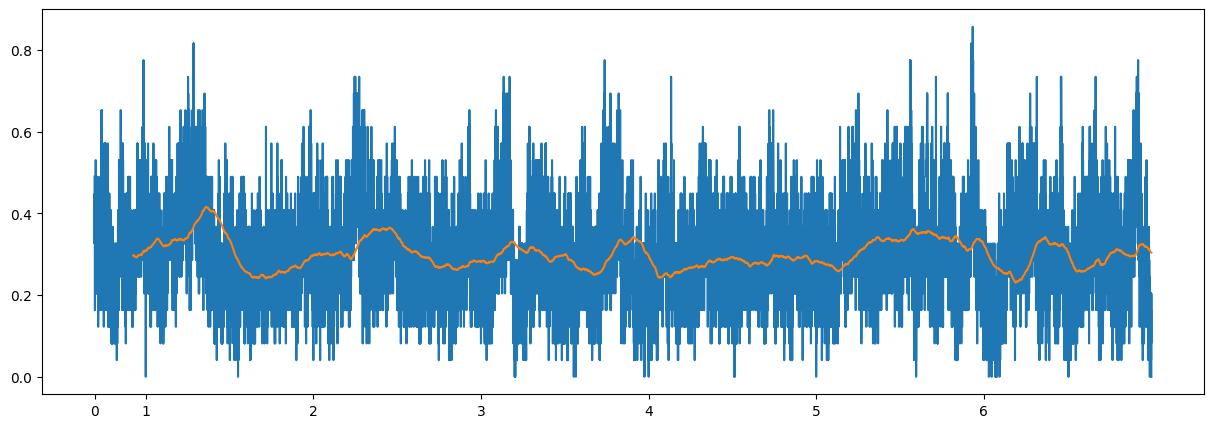

In [9]:
trucated_temporal_graphs  = temporal_graphs[3000:]
truncated_metric_over_time: list[float]  = [metric(snap['graph']) for snap in trucated_temporal_graphs ]
moving_avg = pd.Series(truncated_metric_over_time).rolling(1000).mean()



custom_xticks = day_ticks(trucated_temporal_graphs, start_time=temporal_graphs[0]['timestamp'])

plt.figure(figsize=(15,5))

plt.plot(truncated_metric_over_time)
plt.plot(moving_avg)

plt.xticks(custom_xticks.ids,custom_xticks.days)
plt.show()

In [20]:
for deg in range(50):
    for i,v in enumerate(list_avg_deg):
        if np.floor(v) == deg:
            nx.draw(temporal_graphs[i]['graph'])
            plt.savefig(f"../outputs/deg-graphs/deg_{deg}")
            break


NameError: name 'list_avg_deg' is not defined

In [21]:
path = "./RSSI/3cfe_RSSI_elevage_3_cut.parquet"
rssi = pd.read_parquet(path, engine="pyarrow")

FileNotFoundError: [Errno 2] No such file or directory: './RSSI/3cfe_RSSI_elevage_3_cut.parquet'

In [22]:
rssi

NameError: name 'rssi' is not defined

In [11]:
path = "Accelerometer/366d_accel_elevage_3_cut.parquet"
acc = pd.read_parquet(path, engine="pyarrow")
acc

,acc_x,acc_y,acc_z,tick_accel_day,tick_accel,relative_DateTime,generated_data
0,0.990234,0.150391,-0.239258,86342.0625,305647.2500,2025-03-17 00:00:00.062500,False
1,0.991211,0.145508,-0.242188,86342.1250,305647.3125,2025-03-17 00:00:00.125000,False
2,0.992188,0.149414,-0.240234,86342.1875,305647.3750,2025-03-17 00:00:00.187500,False
3,0.991211,0.150391,-0.239258,86342.2500,305647.4375,2025-03-17 00:00:00.250000,False
4,0.990234,0.150391,-0.241211,86342.3125,305647.5000,2025-03-17 00:00:00.312500,False
...,...,...,...,...,...,...,...
9676784,-0.657224,0.247967,-0.649461,172749.6875,910446.2500,2025-03-23 23:59:58.687500,True
9676785,-0.657224,0.247967,-0.649461,172749.7500,910446.3125,2025-03-23 23:59:58.750000,True
9676786,-0.657224,0.247967,-0.649461,172749.8125,910446.3750,2025-03-23 23:59:58.812500,True
9676787,-0.657224,0.247967,-0.649461,172749.8750,910446.4375,2025-03-23 23:59:58.875000,True
